###  print out structures

In [1]:
import random
import numpy as np
from mycrograd_debug.engine_debug import Value
from mycrograd_debug.nn_debug import Neuron, Layer, MLP
from mycrograd_debug.drawviz_debug import draw_dot
np.random.seed(1337)
random.seed(1337)

In [2]:
# loss function
def loss(targets,outputs):
    total_loss = sum((yout - ygt) ** 2 for ygt, yout in zip(outputs, targets))
    return total_loss


#### Value

number of Value objects created =  1
Value(name=hello1,type=v,data=4.5, grad=0)


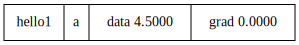

In [3]:
Value.value_counter=0
a=Value(4.5,label='a',name='hello')
print("number of Value objects created = ",Value.value_counter)
print(a)
draw_dot(a)

#### Neuron

neuron nonlin is  False
number of inputs:  3
Neuron:  LinearNeuron(3)
weights:  [Value(name=new1,type=n,data=0.23550571390294128, grad=0), Value(name=new2,type=n,data=0.06653114721000164, grad=0), Value(name=new3,type=n,data=-0.26830328150124894, grad=0)]
b:  Value(name=new4,type=v,data=0, grad=0)
b label:  b
number of parameters  4
[Value(name=new1,type=n,data=0.23550571390294128, grad=0), Value(name=new2,type=n,data=0.06653114721000164, grad=0), Value(name=new3,type=n,data=-0.26830328150124894, grad=0), Value(name=new4,type=v,data=0, grad=0)]
inputs  [8 9 8]
targets  [8]
number of Value objects created =  13
activation:  Value(name=new13,type=v,data=0.33639978410355376, grad=0)


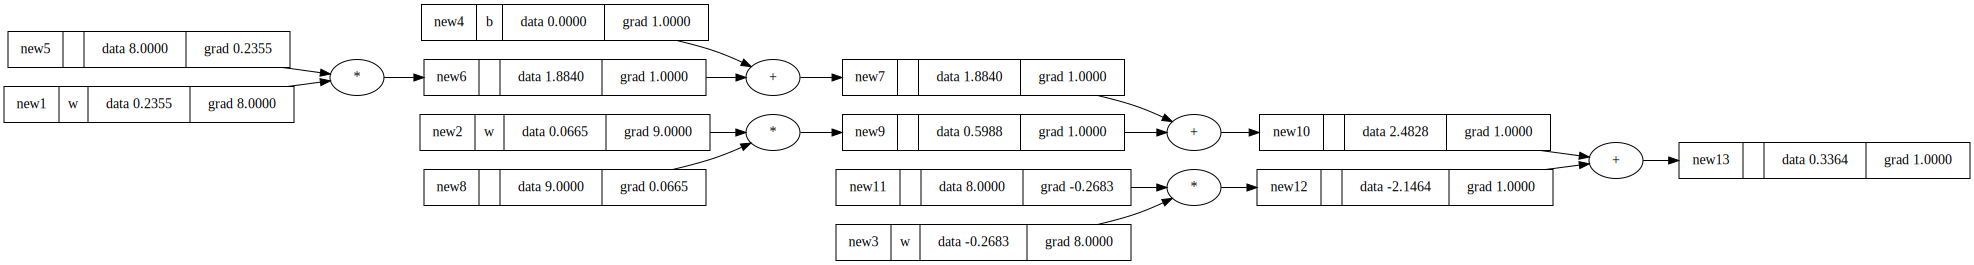

In [4]:
nin=3  #number of inputs
nout=1  #number of outputs

Value.value_counter=0

myNeuron=Neuron(nin)
print("number of inputs: ",nin)
print("Neuron: ",myNeuron)
print("weights: ",myNeuron.w)
print("b: ",myNeuron.b)
print("b label: ",myNeuron.b.label)
print("number of parameters ", len(myNeuron.parameters()))
print(myNeuron.parameters())

# xi=[1,2,3,4]
xi= np.random.randint(1,10, size=(nin))   # inputs
print("inputs ", xi)
xtarget= np.random.randint(1,10, size=(nout))   # targets
print("targets ", xtarget)


#loss_Neuron=loss(myNeuron(xi),xtarget)
loss_Neuron=myNeuron(xi)
print("number of Value objects created = ",Value.value_counter)

print("activation: ",loss_Neuron)
loss_Neuron.backward()
draw_dot(loss_Neuron)

#### Layer

neuron nonlin is  False
neuron nonlin is  False
Layer:  Layer of [LinearNeuron(4), LinearNeuron(4)]
Neurons:  [LinearNeuron(4), LinearNeuron(4)]
Neuron:  LinearNeuron(4)
Neuron:  LinearNeuron(4)
inputs  [3 3 5 9]
number of Value objects created =  34
activation:  [Value(name=new22,type=v,data=-0.34072815032161596, grad=0), Value(name=new34,type=v,data=11.204817195211476, grad=0)]


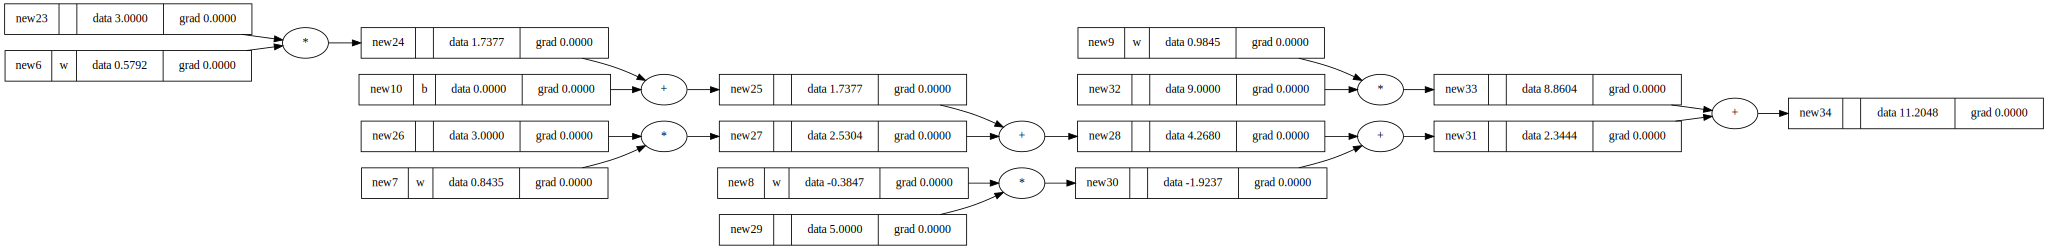

In [5]:
nin=4  #number of inputs
nout=2  #number of outputs

Value.value_counter=0

myLayer=Layer(nin,nout)
print("Layer: ",myLayer)
print("Neurons: ",myLayer.neurons)

for neuron in myLayer.neurons:
    print("Neuron: ",neuron)
xi= np.random.randint(1,10, size=(nin))   # inputs
print("inputs ", xi)
loss_myLayer=myLayer(xi)
print("number of Value objects created = ",Value.value_counter)

print("activation: ",loss_myLayer)
draw_dot(loss_myLayer[1])


#### Multi Layer Perceptron

In [6]:
# initialize a model 
nin=3  #number of inputs
Value.value_counter=0

model = MLP(nin, [4, 4, 1]) # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))
xi= np.random.randint(1,10, size=(nin))   # inputs
print("inputs ", xi)


#ys = [1.0]  # desired targets
#ypred = [model(x) for x in xi]
#loss = sum((yout - ygt) ** 2 for ygt, yout in zip(ys, ypred))


xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0]  # desired targets
ypred = [model(x) for x in xs]
loss = sum((yout - ygt) ** 2 for ygt, yout in zip(ys, ypred))



#loss_model=myNeuron(xi)


print("number of Value objects created = ",Value.value_counter)

#print("activation: ",loss_model)
#draw_dot(loss)


neuron nonlin is  True
neuron nonlin is  True
neuron nonlin is  True
neuron nonlin is  True
neuron nonlin is  True
neuron nonlin is  True
neuron nonlin is  True
neuron nonlin is  True
neuron nonlin is  False
MLP of [Layer of [ReLUNeuron(3), ReLUNeuron(3), ReLUNeuron(3), ReLUNeuron(3)], Layer of [ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4)], Layer of [LinearNeuron(4)]]
number of parameters 41
inputs  [7 7 8]
number of Value objects created =  394


## Gradient

In [7]:
Value.value_counter=0

myNeuron1 = Neuron(1,nonlin=False)
myNeuron2 = Neuron(1,nonlin=False)
print(myNeuron1.parameters())
print("weights: ",myNeuron1.w)

print(myNeuron2.parameters())

input1 = [1.0]
input2 = [1.0]
loss = myNeuron1(input1) * myNeuron2(input2)
print("number of Value objects created = ",Value.value_counter)

print("loss=",loss)

#draw_dot(loss)
loss.backward()

neuron nonlin is  False
neuron nonlin is  False
[Value(name=new1,type=n,data=0.35119774963171047, grad=0), Value(name=new2,type=v,data=0, grad=0)]
weights:  [Value(name=new1,type=n,data=0.35119774963171047, grad=0)]
[Value(name=new3,type=n,data=0.26999576683073867, grad=0), Value(name=new4,type=v,data=0, grad=0)]
number of Value objects created =  11
loss= Value(name=new11,type=v,data=0.09482190572104343, grad=0)


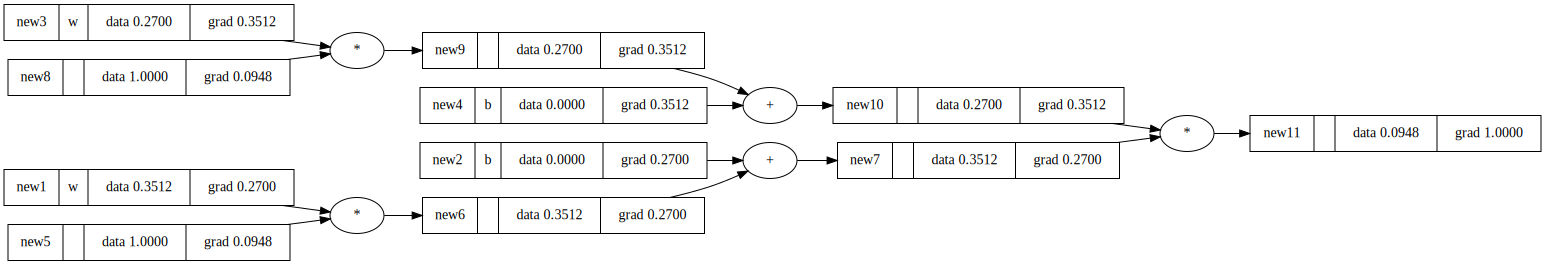

In [8]:
draw_dot(loss)